### Perkenalan

**Uber vs Lyft**

This is a very beginner-friendly dataset. It does contain a lot of NA values. It is a good dataset if you want to use a Linear Regression Model to see the pattern between different predectors such as hour and price.

A really amazing part of this dataset is that I have included the corresponding weather data for that hour with a short summary of the weather. Other important factors are temperature, wind, and sunset



#### *Download Dataset*
Before starting, you need to have the opendatasets library installed in your system.

In [129]:
!pip install opendatasets --q

In [130]:
import opendatasets as od

The dataset can now be downloaded using od.download. When you execute od.download, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds

In [131]:
dataset_url = 'https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma?select=rideshare_kaggle.csv'

In [132]:
od.download(dataset_url)

Skipping, found downloaded files in "./uber-and-lyft-dataset-boston-ma" (use force=True to force download)


### *Import Library*

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing
%matplotlib inline

### *Data Loading*

In [134]:
data = pd.read_csv('./uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv')
pd.set_option("display.max_columns", 100)
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [135]:
# Dimensions of your data
data.shape

(693071, 57)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [137]:
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [138]:
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [139]:
data['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [140]:
data['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [141]:
data['timezone'].unique()

array(['America/New_York'], dtype=object)

In [142]:
data['source'].unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [143]:
data['destination'].unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

### *Data Cleaning*

#### Handling Missing Values

Sebelum handling missing values kita akan bagi data kita berdasarkan tipe data yaitu numerik dan kategorik

In [144]:
df = data.copy()
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [145]:
df[numeric_cols].shape

(693071, 46)

Check missing values pada data dengan tipe data numerik

In [146]:
# print missing values of top columns from index 0-22
df[numeric_cols[0:23]].isnull().sum()

timestamp                      0
hour                           0
day                            0
month                          0
price                      55095
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
dtype: int64

In [147]:
# print missing values of last column from index 23-46
df[numeric_cols[23:]].isnull().sum()

apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureLowTime     0
dewPoint                       0
pressure                       0
windBearing                    0
cloudCover                     0
uvIndex                        0
visibility.1                   0
ozone                          0
sunriseTime                    0
sunsetTime                     0
moonPhase                      0
precipIntensityMax             0
uvIndexTime                    0
temperatureMin                 0
temperatureMinTime             0
temperatureMax                 0
temperatureMaxTime             0
apparentTemperatureMin         0
apparentTemperatureMinTime     0
apparentTemperatureMax         0
apparentTemperatureMaxTime     0
dtype: int64

Terdapat missing values pada kolom price sebanyak 55095

In [148]:
df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             693071 non-null  object
 1   datetime       693071 non-null  object
 2   timezone       693071 non-null  object
 3   source         693071 non-null  object
 4   destination    693071 non-null  object
 5   cab_type       693071 non-null  object
 6   product_id     693071 non-null  object
 7   name           693071 non-null  object
 8   short_summary  693071 non-null  object
 9   long_summary   693071 non-null  object
 10  icon           693071 non-null  object
dtypes: object(11)
memory usage: 58.2+ MB


In [149]:
# Create a variable that indicates whether the value of the variable `price` is missing or not


df['price_null'] = np.where(df.price.isnull(), 1, 0)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price_null
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,0
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,0
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,0
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,0
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,0


In [150]:
# Grouping data by cab_type and find nulls for `price`

print('Value Counts')
print(df.groupby(['cab_type'])['price_null'].value_counts())

print('-'*100)
print('Mean')
print(df.groupby(['cab_type'])['price_null'].mean())

Value Counts
cab_type  price_null
Lyft      0             307408
Uber      0             330568
          1              55095
Name: price_null, dtype: int64
----------------------------------------------------------------------------------------------------
Mean
cab_type
Lyft    0.000000
Uber    0.142858
Name: price_null, dtype: float64


Berdasarkan data tersebut bahwa nilai yang hilang pada kolom harga hanya terjadi pada cab_type Uber sebanyak 14%, Karena faktor harga sangat dipengaruhi banyak hal maka kita akan drop missing values pada kolom price 

In [151]:
df.shape

(693071, 58)

In [152]:
df = df.dropna(axis=0)

In [153]:
df.shape

(637976, 58)

### *Eksplorasi Data*

In [154]:
cab_type = df['cab_type'].value_counts()
labels = df['cab_type'].unique()

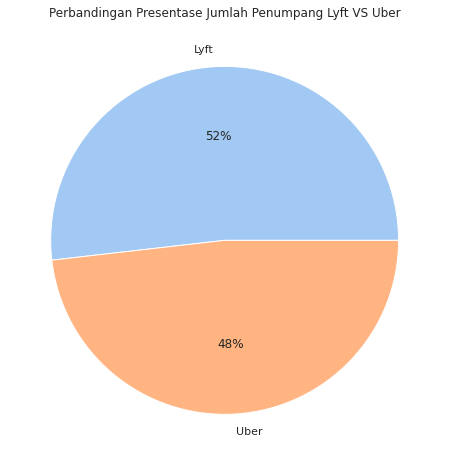

In [155]:
colors = sns.color_palette('pastel')[0:10]
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
plt.pie(cab_type, labels= labels, colors=colors, autopct='%.0f%%')
plt.title('Perbandingan Presentase Jumlah Penumpang Lyft VS Uber')
plt.show()

Dari data tersebut dapat dilihat bahwa 52% penduduk di kota New York lebih sering memakai jasa Lyft dan 48% memakai jasa Uber

#### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns.

This relationship is often expressed numerically using a measure called the _correlation coefficient_


In [156]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [157]:
df[numeric_cols].shape

(637976, 47)

In [158]:
df[categorical_cols].columns

Index(['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')

In [159]:
corrMatrix = df[numeric_cols].corr()

In [160]:
corrMatrix

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price_null
timestamp,1.000000,-0.028501,-0.341420,0.771245,0.000808,0.003290,0.000611,0.168295,-0.136716,-0.249027,-0.226472,-0.179834,-0.147351,-0.167740,-0.066364,0.005565,0.998843,0.158577,-0.228324,0.999332,-0.366885,0.999175,-0.215550,0.999312,-0.402043,0.999204,-0.265512,0.533074,-0.133853,-0.081522,-0.025986,0.158577,0.196566,0.999372,0.999372,-0.846279,-0.211887,0.999364,-0.307194,0.998195,-0.186495,0.999290,-0.378538,0.998288,-0.157891,0.999276,NaN
hour,-0.028501,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.019228,-0.005986,0.218829,0.198212,-0.233246,-0.129631,-0.275778,0.073011,0.077646,-0.028544,0.173776,0.005191,-0.028323,0.015000,-0.027267,0.005518,-0.028481,0.015722,-0.027438,0.004863,-0.067787,0.036292,0.026680,0.330326,0.173776,0.034035,-0.028016,-0.028014,0.020997,0.020288,-0.027997,0.015668,-0.027486,0.002982,-0.028479,0.015882,-0.028172,0.002904,-0.028273,NaN
day,-0.341420,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,0.006744,0.078539,-0.083934,-0.223410,0.091513,0.030765,-0.093376,0.440512,0.402611,-0.336560,0.105210,-0.283410,-0.343251,-0.088370,-0.333686,-0.398099,-0.343422,-0.192984,-0.335630,-0.101470,-0.444738,0.092226,-0.041103,-0.012083,0.105210,0.376791,-0.341201,-0.341145,-0.007038,0.145789,-0.341330,0.038089,-0.334118,-0.304704,-0.344669,-0.019878,-0.335176,-0.444366,-0.344546,NaN
month,0.771245,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.082048,0.024773,-0.154356,-0.097803,-0.022078,-0.334897,-0.270541,0.767339,0.011129,0.068094,0.772119,-0.138703,0.765551,0.152479,0.772227,-0.087019,0.766883,-0.074906,0.589683,-0.135317,-0.016767,-0.012340,0.011129,-0.149111,0.770749,0.770712,-0.452655,-0.213301,0.770832,-0.191928,0.765319,0.105113,0.773057,-0.191293,0.766097,0.214928,0.772962,NaN
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746,NaN
distance,0.003290,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,-0.002835,-0.000512,0.000134,-0.003849,0.001709,0.000920,0.003371,0.004143,-0.003795,0.003338,-0.001744,0.003282,-0.003699,0.003317,-0.001006,0.003311,-0.003920,0.003565,-0.002638,-0.000958,0.002422,0.004143,0.001206,0.003291,0.003291,-0.004301,0.000670,0.003298,-0.003192,0.003166,-0.003875,0.003318,-0.003649,0.003266,-0.003889,0.003319,NaN
surge_multiplier,0.000611,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,-0.002586,-0.001522,-0.002825,-0.001677,0.002593,0.002162,0.000477,0.001716,-0.001943,0.000560,-0.002669,0.000614,-0.002098,0.000559,-0.003088,0.000592,-0.001860,-0.003109,0.002171,-0.002101,-0.002567,0.001716,0.003456,0.000585,0.000585,-0.000163,-0.000090,0.000585,-0.000716,0.000594,-0.001998,0.000563,-0.001317,0.000502,-0.002214,0.000559,NaN
latitude,0.168295,0.019228,0.006744,0.085946,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,-0.067427,-0.074306,-0.071331,-0.117721,-0.097125,0.024346,0.172786,0.124286,-0.115623,

Dari Hasil Korelasi diatas dapat diperoleh features yang memiliki korelasi terhadap variable predictor price adalah distance dan surge multiplier

In [161]:
df.price.corr(df.distance)

0.34506106627965094

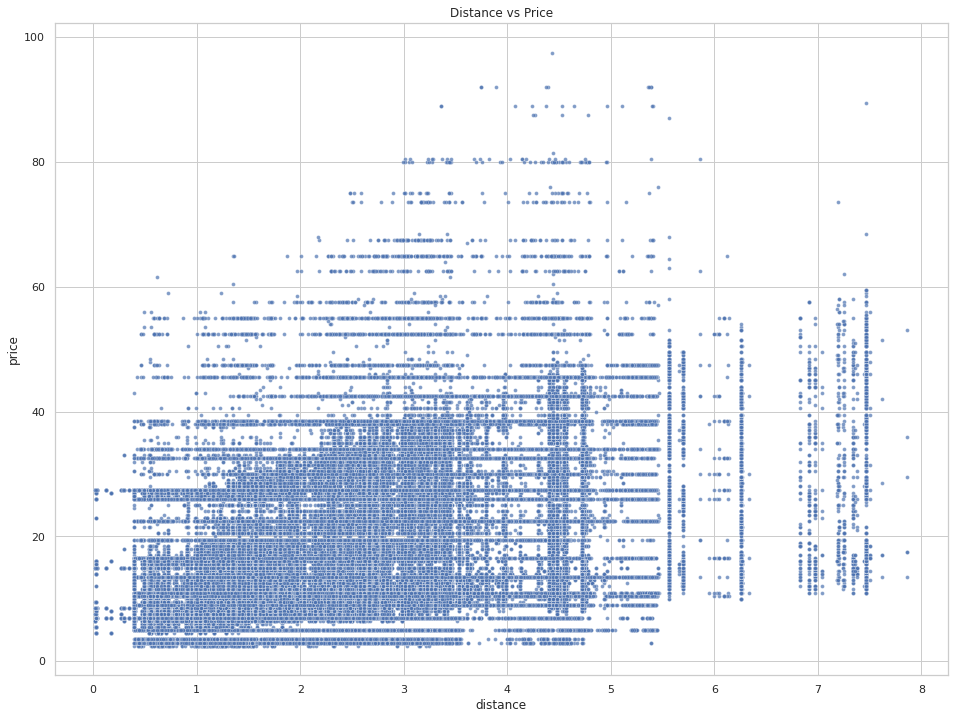

In [162]:
plt.figure(figsize=(16, 12))
plt.title('Distance vs Price')
sns.scatterplot(data=df, x='distance', y='price', alpha=0.7, s=15)

In [163]:
df.price.corr(df.surge_multiplier)

0.24045812658966428

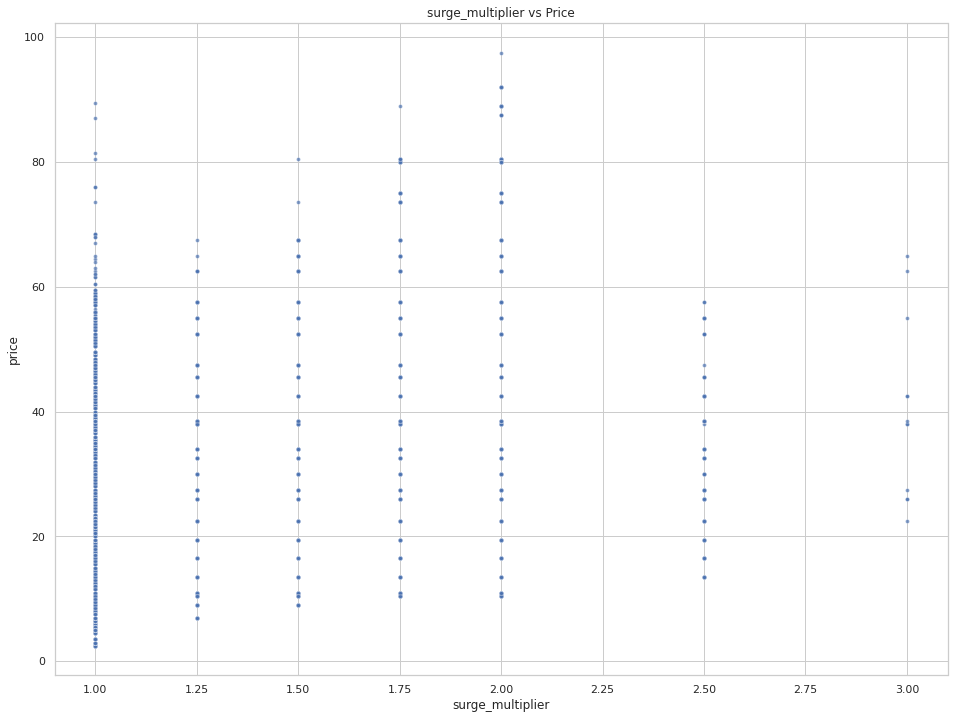

In [164]:
plt.figure(figsize=(16, 12))
plt.title('surge_multiplier vs Price')
sns.scatterplot(data=df, x='surge_multiplier', y='price', alpha=0.7, s=15)

In [170]:
df_type = df.groupby(['cab_type', 'name', 'price']).count()

In [171]:
df_type['id']

cab_type  name  price
Lyft      Lux   10.5      2932
                11.0      2838
                13.5     12062
                16.5     11345
                19.5      9770
                         ...  
Uber      WAV   32.0         2
                35.0         1
                36.5         1
                41.5         1
                44.0         1
Name: id, Length: 535, dtype: int64

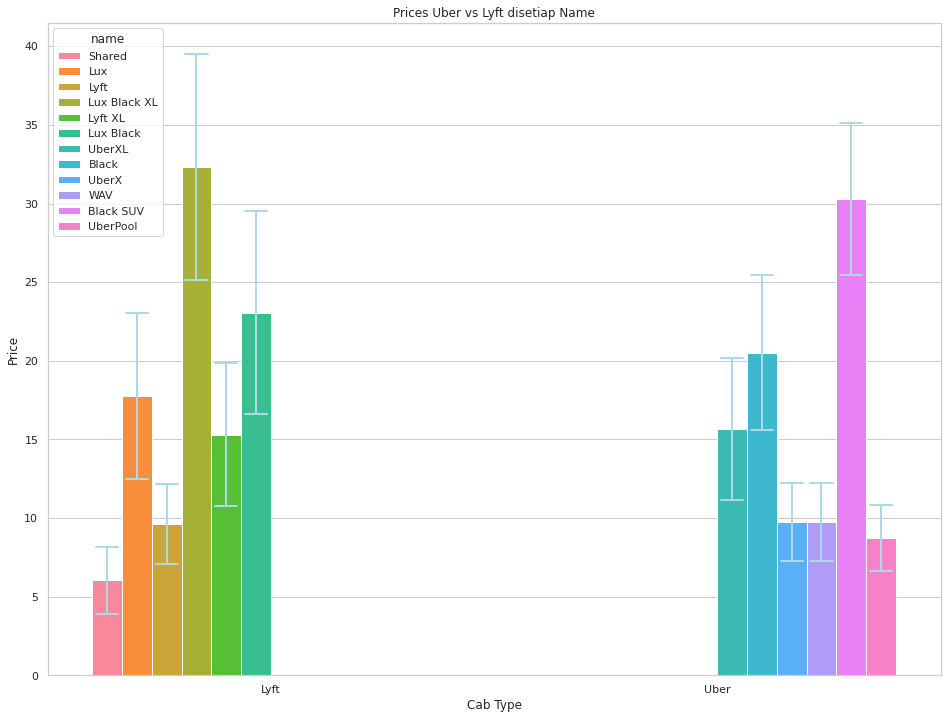

In [39]:
sns.axes_style('darkgrid')
plt.figure(figsize=(16, 12))
sns.barplot(x='cab_type', y='price', hue='name', 
             data=df, ci='sd',
             capsize=0.05,
             saturation=5,
             errcolor='lightblue',
             errwidth=2)
plt.xlabel("Cab Type")
plt.ylabel("Price")
plt.title("Prices Uber vs Lyft disetiap Name")
plt.show()

Dari grafik tersebut dapat disimpulkan bahwa dari name Lyft dengan price yang paling tinggi adalah LUX Black XL, sedangkan untuk Uber denga price yang paling tinggi adalah Black SUV 

### *Data Preprocessing*

In [178]:
enc = preprocessing.OneHotEncoder()

In [188]:
df_new = df.copy()

In [189]:
df_new = df_new[['distance', 'surge_multiplier', 'price', 'name']]

In [190]:
df_new.head()

,distance,surge_multiplier,price,name
0,0.44,1.0,5.0,Shared
1,0.44,1.0,11.0,Lux
2,0.44,1.0,7.0,Lyft
3,0.44,1.0,26.0,Lux Black XL
4,0.44,1.0,9.0,Lyft XL


In [176]:
num = df_new.select_dtypes(include=np.number).columns.tolist()[:-1]
categ = df_new.select_dtypes('object').columns.tolist()

In [177]:
num

['distance', 'surge_multiplier']

In [99]:
categ

['name']

In [102]:
enc.fit(df_new[categ])
enc.categories_

[array(['Black', 'Black SUV', 'Lux', 'Lux Black', 'Lux Black XL', 'Lyft',
        'Lyft XL', 'Shared', 'UberPool', 'UberX', 'UberXL', 'WAV'],
       dtype=object)]

In [103]:
one_hot_name = enc.transform(df_new[categ]).toarray()
one_hot_name

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [191]:
df_new[['Black', 'Black SUV', 'Lux', 'Lux Black', 'Lux Black XL', 'Lyft',
        'Lyft XL', 'Shared', 'UberPool', 'UberX', 'UberXL', 'WAV']] = one_hot_name

In [193]:
df_new.drop(['name'], axis=1, inplace=True)

In [194]:
df_new.head()

,distance,surge_multiplier,price,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.44,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.44,1.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.44,1.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.44,1.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.44,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### *Pendefinisian Model*

In [195]:
X = df_new.loc[:, ['distance', 'surge_multiplier', 'Black', 'Black SUV', 'Lux', 'Lux Black', 'Lux Black XL', 'Lyft',
        'Lyft XL', 'Shared', 'UberPool', 'UberX', 'UberXL', 'WAV']]
y = df_new['price']

In [196]:
X.head()

,distance,surge_multiplier,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [197]:
y.head()

0     5.0
1    11.0
2     7.0
3    26.0
4     9.0
Name: price, dtype: float64

In [198]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [199]:
X_train.shape

(510380, 14)

In [200]:
X_test.shape

(127596, 14)

In [211]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
#sc.fit(X_train.iloc[:, 0:2])
#X_train.iloc[:, 0:2] = sc.transform(X_train.iloc[:, 0:2])
#X_test.iloc[:, 0:2] = sc.transform(X_test.iloc[:, 0:2])


In [212]:
X_train

array([[ 0.02783353, -0.15789175, -0.30744435, ...,  3.25622076,
        -0.30727636, -0.30696312],
       [ 0.90856037, -0.15789175, -0.30744435, ..., -0.30710449,
        -0.30727636, -0.30696312],
       [-0.49179531, -0.15789175, -0.30744435, ..., -0.30710449,
        -0.30727636, -0.30696312],
       ...,
       [-0.94977327, -0.15789175, -0.30744435, ...,  3.25622076,
        -0.30727636, -0.30696312],
       [-1.35490762, -0.15789175, -0.30744435, ..., -0.30710449,
        -0.30727636, -0.30696312],
       [ 0.13352075,  5.09073509, -0.30744435, ..., -0.30710449,
        -0.30727636, -0.30696312]])

In [213]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

### *Pelatihan Model*

In [214]:
model.fit(X_train, y_train)

LinearRegression()

###  *Evaluasi Model*

In [215]:
from sklearn.metrics import r2_score, mean_squared_error
#predicting r2 score from training data
y_pred_linear_train = model.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)


#predicting r2 score from test data
y_pred_linear_test = model.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear_test)

R2_score (train):  0.927234249164634
R2_score (test):  0.9273883683708796
RMSE:  2.5160112740164426


Model meiliki akurasi 92% untuk nilai R2

### *Model Inference*

In [216]:
new_data = [[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
result = model.predict(sc.transform(new_data))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([35.45368185])

Kita memprediksi distance=1, surge_multiplier = 1, dan name = Black SUV menghasilkan price = 35.45

### Pengambilan Kesimpulan

Feature yang memiliki korelasi dan independent yang dimodelkan dalam regressi adalah distance, surge_multiplier, dan name

Nilai R2 score test 92% artinya dengan model kita cukup akurat untuk memprediksi harga